<a href="https://colab.research.google.com/github/takegg0311/mahoroba19/blob/main/mahoroba19_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# あすけんのアドバイスを、にじボイスで読んで貰う

## 0. 前準備

### 0-1. Pythonライブラリの読み込み

In [ ]:
import json
import requests
from google.colab import userdata

### 0-2. askenに登録、食事を記録
[あすけん](https://www.asken.jp/) に会員登録し、朝食・昼食・夕食の食事と、運動の記録を付けます。

スマホアプリから、Googleヘルスコネクトやfitbit、Appleヘルスケアなどと連携して、運動記録を自動取得することも出来ます。

プレミアム会員（484円/月）になると、1食ごとのアドバイスも得られます。


### 0-3. にじボイスAPIキーの取得
[にじボイス](https://nijivoice.com/) から「にじボイスAPI」にサインインし、APIキーを発行します。
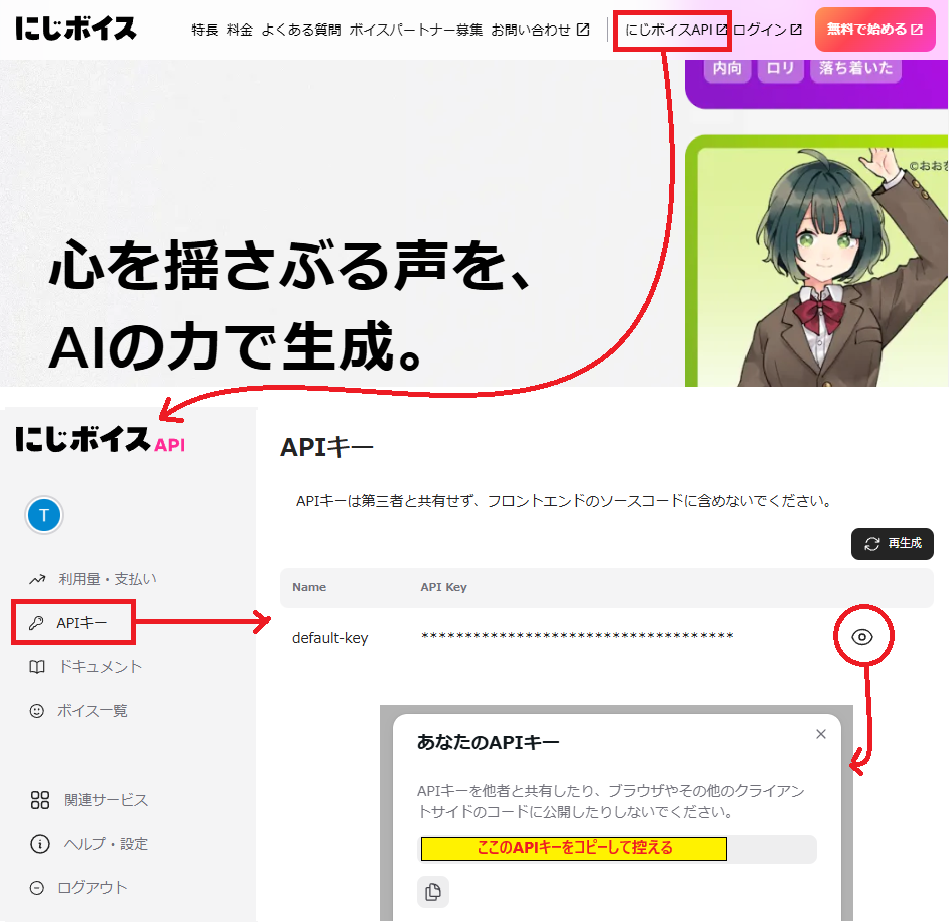

### 0-4. APIキーのシークレット設定
1. 左メニューから「シークレット」を開く
2. 「＋新しいシークレットを追加」をクリック
3. 名前に「NIJIVOICE_API_KEY」と入力
4. 値に発行したAPIキーを入力
5. NIJIVOICE_API_KEYの「ノートブックからのアクセス」をONにする
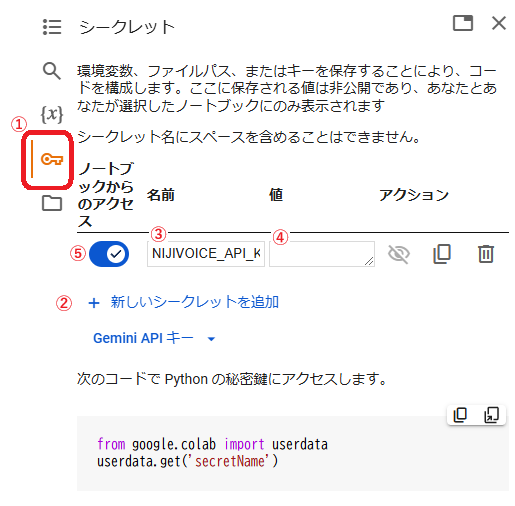

In [ ]:
# シークレットから、にじボイスAPIのAPIキーを取得
NIJIVOICE_API_KEY = userdata.get('NIJIVOICE_API_KEY')

### 0-5. OpenAI APIキーの取得、シークレット設定
OpenAI APIに登録・課金設定を行います。

シークレットの「OPENAI_ORGANIZATION」にOrganization IDを、「OPENAI_API_KEY」に発行したSecret Keyを設定し、それぞれの「ノートブックからのアクセス」をONにします。

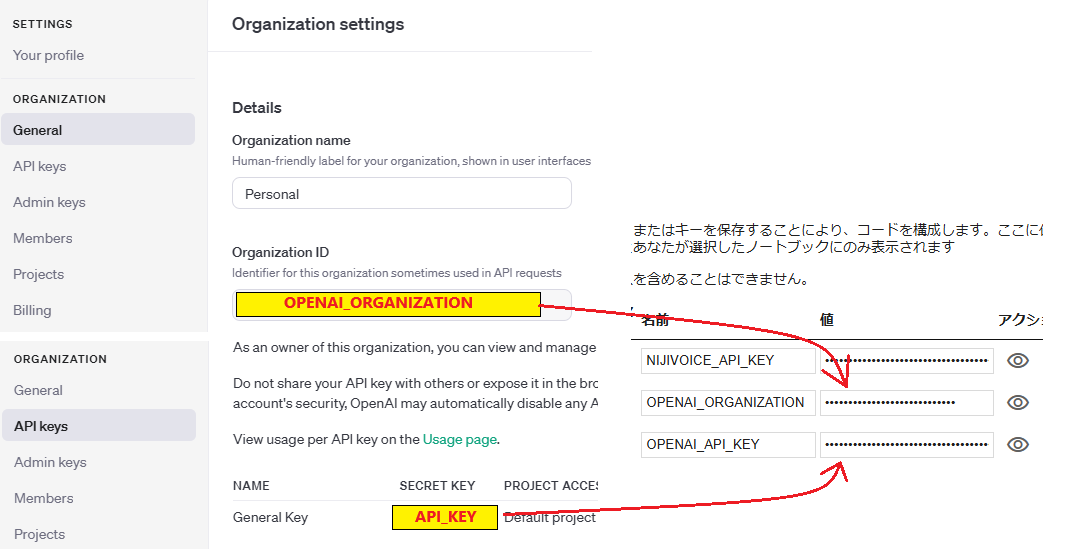

In [ ]:
OPENAI_ORGANIZATION = userdata.get('OPENAI_ORGANIZATION')
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

## 1. あすけん

### 1-1. 冒頭吹き出しのアドバイスを入力
あすけんのアドバイスを、下の入力欄にコピペします。（ユーザー名などは適宜修正してください）

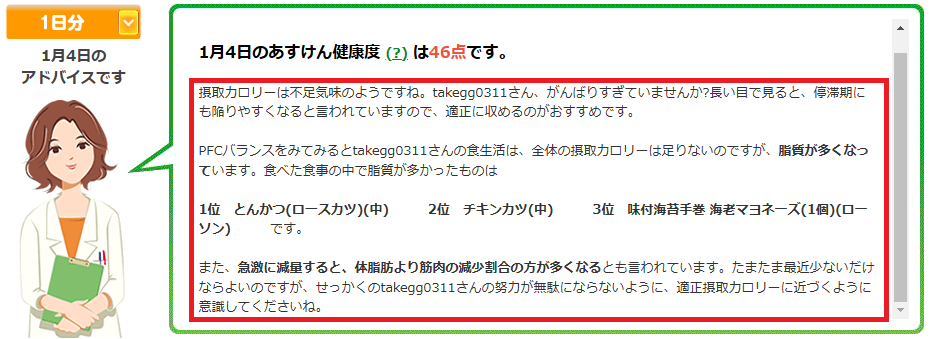

In [ ]:
asken_advice_fuki = "摂取カロリーは不足気味のようですね。がんばりすぎていませんか?長い目で見ると、停滞期にも陥りやすくなると言われていますので、適正に収めるのがおすすめです。  PFCバランスをみてみると食生活は、全体の摂取カロリーは足りないのですが、脂質が多くなっています。食べた食事の中で脂質が多かったものは  1位　とんかつ(ロースカツ)(中)　　　2位　チキンカツ(中)　　　3位　味付海苔手巻 海老マヨネーズ(1個)(ローソン)　　　です。  また、急激に減量すると、体脂肪より筋肉の減少割合の方が多くなるとも言われています。たまたま最近少ないだけならよいのですが、せっかくの努力が無駄にならないように、適正摂取カロリーに近づくように意識してくださいね。" # @param {"type":"string"}


### 1-2. 栄養価の過不足のアドバイスを入力

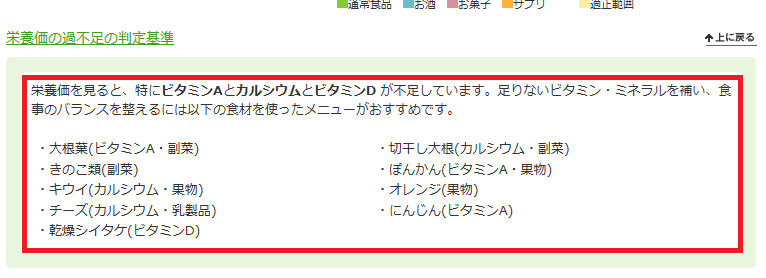

In [ ]:
asken_advice_eiyo = "栄養価を見ると、特にビタミンAとカルシウムとビタミンD が不足しています。足りないビタミン・ミネラルを補い、食事のバランスを整えるには以下の食材を使ったメニューがおすすめです。  ・大根葉(ビタミンA・副菜)・切干し大根(カルシウム・副菜) ・きのこ類(副菜)・ぽんかん(ビタミンA・果物) ・キウイ(カルシウム・果物)・オレンジ(果物) ・チーズ(カルシウム・乳製品)・にんじん(ビタミンA) ・乾燥シイタケ(ビタミンD)" # @param {"type":"string"}


### 1-3. 食事バランスガイドのアドバイスを入力

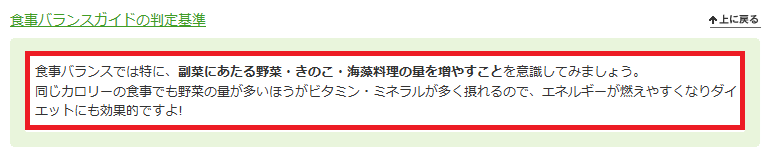

In [ ]:
asken_advice_meal = "食事バランスでは特に、副菜にあたる野菜・きのこ・海藻料理の量を増やすことを意識してみましょう。 同じカロリーの食事でも野菜の量が多いほうがビタミン・ミネラルが多く摂れるので、エネルギーが燃えやすくなりダイエットにも効果的ですよ!" # @param {"type":"string"}



### 1-4. 運動量のアドバイスを入力

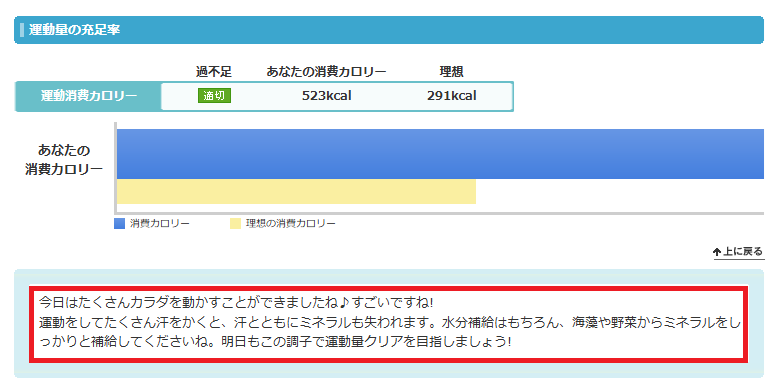

In [ ]:
asken_advice_act = "今日はたくさんカラダを動かすことができましたね♪すごいですね! 運動をしてたくさん汗をかくと、汗とともにミネラルも失われます。水分補給はもちろん、海藻や野菜からミネラルをしっかりと補給してくださいね。明日もこの調子で運動量クリアを目指しましょう!" # @param {"type":"string"}


### 1-5. アドバイスを連結してプロンプトに整理

In [ ]:
asken_advice_all = f"""あなたはuserのパートナーです。
以下のダイエット記録と、管理栄養士からのコメントをベースに、200文字程度の話し言葉で、userを勇気づけるように返答してください。
# 管理栄養士のコメント
## 総合
{asken_advice_fuki}
## 運動面
{asken_advice_act}
## 栄養面
{asken_advice_eiyo}
{asken_advice_meal}"""
asken_advice_all

'あなたはuserのパートナーです。\n以下のダイエット記録と、管理栄養士からのコメントをベースに、200文字程度の話し言葉で、userを勇気づけるように返答してください。\n# 管理栄養士のコメント\n## 総合\n摂取カロリーは不足気味のようですね。がんばりすぎていませんか?長い目で見ると、停滞期にも陥りやすくなると言われていますので、適正に収めるのがおすすめです。  PFCバランスをみてみると食生活は、全体の摂取カロリーは足りないのですが、脂質が多くなっています。食べた食事の中で脂質が多かったものは  1位\u3000とんかつ(ロースカツ)(中)\u3000\u3000\u30002位\u3000チキンカツ(中)\u3000\u3000\u30003位\u3000味付海苔手巻 海老マヨネーズ(1個)(ローソン)\u3000\u3000\u3000です。  また、急激に減量すると、体脂肪より筋肉の減少割合の方が多くなるとも言われています。たまたま最近少ないだけならよいのですが、せっかくの努力が無駄にならないように、適正摂取カロリーに近づくように意識してくださいね。\n## 運動面\n今日はたくさんカラダを動かすことができましたね♪すごいですね! 運動をしてたくさん汗をかくと、汗とともにミネラルも失われます。水分補給はもちろん、海藻や野菜からミネラルをしっかりと補給してくださいね。明日もこの調子で運動量クリアを目指しましょう!\n## 栄養面\n栄養価を見ると、特にビタミンAとカルシウムとビタミンD が不足しています。足りないビタミン・ミネラルを補い、食事のバランスを整えるには以下の食材を使ったメニューがおすすめです。  ・大根葉(ビタミンA・副菜)・切干し大根(カルシウム・副菜) ・きのこ類(副菜)・ぽんかん(ビタミンA・果物) ・キウイ(カルシウム・果物)・オレンジ(果物) ・チーズ(カルシウム・乳製品)・にんじん(ビタミンA) ・乾燥シイタケ(ビタミンD)\n食事バランスでは特に、副菜にあたる野菜・きのこ・海藻料理の量を増やすことを意識してみましょう。 同じカロリーの食事でも野菜の量が多いほうがビタミン・ミネラルが多く摂れるので、エネルギーが燃えやすくなりダイエットにも効果的ですよ!'

## 2. OpenAI API

### 2-1. ライブラリの読み込み

In [ ]:
# OpenAI API
from openai import OpenAI

### 2-2. OpenAI APIクライアントの作成

In [ ]:
openai_client = OpenAI(
    organization = OPENAI_ORGANIZATION,
    api_key = OPENAI_API_KEY
    )

### 2-3. OpenAI APIリクエスト

In [ ]:
messages = [{"role": "system", "content": asken_advice_all}]

In [ ]:
chat_res = openai_client.chat.completions.create(
        model="gpt-4o-mini"  # GPTのエンジン名を指定します
        , messages=messages
        , max_tokens=2000  # 生成するトークンの最大数
        , n=1  # 生成するレスポンスの数
        , stop=None  # 停止トークンの設定
        , temperature=0.7  # 生成時のランダム性の制御
        , top_p=1  # トークン選択時の確率閾値
    )
chat_res

ChatCompletion(id='chatcmpl-AmgSZGkfusjjs2CfkOGl53aMgfRXN', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='すごいね！たくさん運動できたんだね！でも、カロリーが足りないみたいだから、ちょっと心配だよ。無理しないで、バランスよく食べることを意識してみてね。ビタミンやミネラルをしっかり摂ることで、体調も良くなってダイエットも進むよ。野菜や果物をもっと取り入れて、元気に頑張ろう！明日も一緒にがんばろうね！', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1736166323, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier=None, system_fingerprint='fp_0aa8d3e20b', usage=CompletionUsage(completion_tokens=129, prompt_tokens=721, total_tokens=850, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

In [ ]:
voice_script = chat_res.choices[0].message.content
voice_script

'すごいね！たくさん運動できたんだね！でも、カロリーが足りないみたいだから、ちょっと心配だよ。無理しないで、バランスよく食べることを意識してみてね。ビタミンやミネラルをしっかり摂ることで、体調も良くなってダイエットも進むよ。野菜や果物をもっと取り入れて、元気に頑張ろう！明日も一緒にがんばろうね！'

## 3. にじボイスAPI

### 3-1. ライブラリのインポート

In [ ]:
import IPython
import urllib

### 3-2. にじボイスAPIのモデル指定
[にじボイスAPIのボイス一覧](https://platform.nijivoice.com/characters)から、ボイスモデルのIDをコピーして、下の入力欄に入力します。
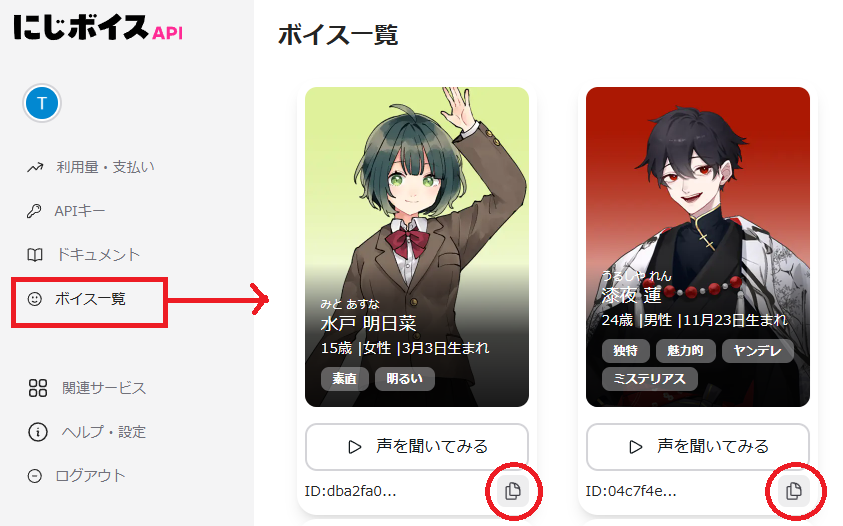

### 3-3. ボイスモデルのIDを入力 (プリセット = 水戸明日菜)

In [ ]:
nijivoice_id = "dba2fa0e-f750-43ad-b9f6-d5aeaea7dc16" # @param {"type":"string","placeholder":"ボイスモデルのIDを入力"}

### 3-4. にじボイスAPI音声合成リクエスト
ドキュメント https://docs.nijivoice.com/reference/postv1voiceactorsidgeneratevoice

In [ ]:
# ボイスモデルのIDがURL内に埋め込まれます
nijivoice_url = f"https://api.nijivoice.com/api/platform/v1/voice-actors/{nijivoice_id}/generate-voice"

In [ ]:
# リクエストパラメータ (再生速度1.0)
params = {
    "script": voice_script,
    "speed": "1.0",
}

# リクエストヘッダー (APIキーを指定)
headers = {
    "x-api-key": NIJIVOICE_API_KEY,
}

POSTリクエストを実行して、Response [200] が返ってくれば成功

Response [400] となる場合は、APIキーが正しいか確認してください

In [ ]:
voice_res = requests.post(nijivoice_url, json=params, headers=headers)
voice_res

<Response [200]>

In [ ]:
# 中身のJSON
json.loads(voice_res.text)

{'generatedVoice': {'audioFileUrl': 'https://storage.googleapis.com/ai-voice-prod-storage/platform/2729416d-007a-4e14-8689-5d650f08dcf3/voices/2025/01/06/fe65b8a8-d79f-4ed2-ba35-81762fb0b609/uploaded-audio.mp3?GoogleAccessId=ai-voice-api-prod-sa%40algomatic-global-ai-voice.iam.gserviceaccount.com&Expires=1736252756&Signature=IWo2eRZn4TsQ06BtebtQefdTn%2Bv42m4nwJrg0GS8EUgBQPk3CGpf2Gh0yWj0P6PftWRSEnsaPfvf%2Fue%2BQ7n5SlGjv68n5Wy6JdhA%2F7tvBGH1AnHA3IIvgejYMvoSZOwVMoEceb5LRtVSI2ZoLDtuOGZ6m8Mry1O%2BknoKvUfVpNTpYfv3nBm4OzBEb64MQY5aS8fmlc%2Bokn4wg0fpGgADGSPePxrIos1K4y%2B%2FEMGvgHBFO20Vv97QmBsWmkx8uiSTjG%2Bkl6RdpzH89FgMX3X%2BiMkVAfUIXy72rFPhz9mWUGa7WsDw71aiLjIWpBhg6FvN6oSyUUEzd8KOCV%2Fk%2FBNSUw%3D%3D',
  'audioFileDownloadUrl': 'https://storage.googleapis.com/ai-voice-prod-storage/platform/2729416d-007a-4e14-8689-5d650f08dcf3/voices/2025/01/06/fe65b8a8-d79f-4ed2-ba35-81762fb0b609/uploaded-audio.mp3?GoogleAccessId=ai-voice-api-prod-sa%40algomatic-global-ai-voice.iam.gserviceaccount.com&Expires=17

JSONの中身
- generatedVoice = 生成音声に関する内容
  - audioFileUrl = 直接再生する場合のURL
  - audioFileDownloadUrl = ダウンロードする場合のURL　**※今回はこれを使用**
  - duration = 音声のミリ秒数
  - remainingCredits = APIの残り文字数

### 3-5. mp3ファイルをダウンロードして再生

In [ ]:
# audioFileDownloadUrlを取得
audio_url = json.loads(voice_res.text)['generatedVoice']['audioFileDownloadUrl']
audio_url

'https://storage.googleapis.com/ai-voice-prod-storage/platform/2729416d-007a-4e14-8689-5d650f08dcf3/voices/2025/01/06/fe65b8a8-d79f-4ed2-ba35-81762fb0b609/uploaded-audio.mp3?GoogleAccessId=ai-voice-api-prod-sa%40algomatic-global-ai-voice.iam.gserviceaccount.com&Expires=1736252756&Signature=IWo2eRZn4TsQ06BtebtQefdTn%2Bv42m4nwJrg0GS8EUgBQPk3CGpf2Gh0yWj0P6PftWRSEnsaPfvf%2Fue%2BQ7n5SlGjv68n5Wy6JdhA%2F7tvBGH1AnHA3IIvgejYMvoSZOwVMoEceb5LRtVSI2ZoLDtuOGZ6m8Mry1O%2BknoKvUfVpNTpYfv3nBm4OzBEb64MQY5aS8fmlc%2Bokn4wg0fpGgADGSPePxrIos1K4y%2B%2FEMGvgHBFO20Vv97QmBsWmkx8uiSTjG%2Bkl6RdpzH89FgMX3X%2BiMkVAfUIXy72rFPhz9mWUGa7WsDw71aiLjIWpBhg6FvN6oSyUUEzd8KOCV%2Fk%2FBNSUw%3D%3D&response-content-disposition=attachment%3B%20filename%3D%22voice_%E3%81%99%E3%81%94%E3%81%84%E3%81%AD%E3%81%9F%E3%81%8F%E3%81%95%E3%82%93%E9%81%8B%E5%8B%95%E3%81%A7%E3%81%8D%E3%81%9F%E3%82%93%E3%81%A0%E3%81%AD%E3%81%A7%E3%82%82_%E6%B0%B4%E6%88%B8%20%E6%98%8E%E6%97%A5%E8%8F%9C.mp3%22'

In [ ]:
# audioFileDownloadUrlから音声ファイルを「audio.mp3」としてColab上にダウンロード
urllib.request.urlretrieve(audio_url, "audio.mp3")

('audio.mp3', <http.client.HTTPMessage at 0x79bacc484d00>)

In [ ]:
# ダウンロードした「audio.mp3」を再生する
IPython.display.Audio(data="audio.mp3", autoplay=True)

### 3-Ex. 音声生成後の注意
- 【注意1】GoogleColab上にダウンロードしたファイルは、Colabのセッションを切ると破棄されます
- 【注意2】にじボイスAPIの音声生成URLも、一定時間で破棄されるようです

生成した音声を恒久的に保存しておきたい場合は、左のファイルメニューからダウンロードしておきましょう
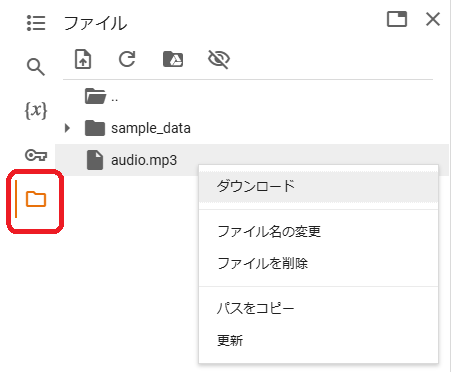